In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import model_statistics as ms
from sklearn.model_selection import train_test_split
from linear_regression import LinearRegression

# Importing Data

In [16]:
df = pd.read_csv('C:/Users/mhahi/Desktop/Machine Learning/Linear Regression/advertising.csv')

# Exploring Data

In [17]:
df.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


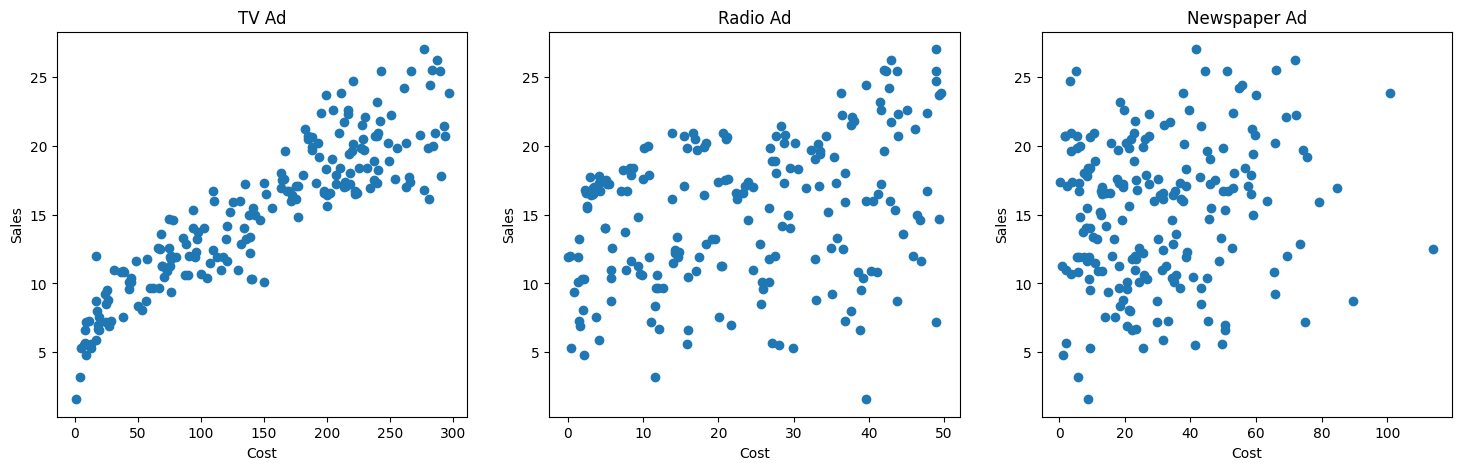

In [19]:
cols = ['TV', 'Radio', 'Newspaper']
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i, label in enumerate(cols):
    ax[i].scatter(df[label], df['Sales'])
    ax[i].set_title(f'{label} Ad')
    ax[i].set_xlabel('Cost')
    ax[i].set_ylabel('Sales')

# Training Process

In [20]:
cols = ['TV', 'Radio', 'Newspaper']
x = df[cols]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=67)

In [ ]:
model = LinearRegression(learning_rate=0.01, iterations=100000, epsilon=1e-15,
                         lamda=1, regularization='lasso')
x_train_scaled = model.min_normalization(x_train)

In [29]:
model.fit(x_train_scaled, y_train)

iteration: 0, cost: 131.15588584521888
iteration: 10000, cost: 1.3173515518977532
iteration: 20000, cost: 1.31729513279908
iteration: 30000, cost: 1.3172950822173102
The model has found the optimal coefficients. 
 iterations: 38469 
 cost: 1.3172950820819187


In [30]:
model.coef_rescale()
model.weights

TV           0.053087
Radio        0.114859
Newspaper   -0.007347
dtype: float64

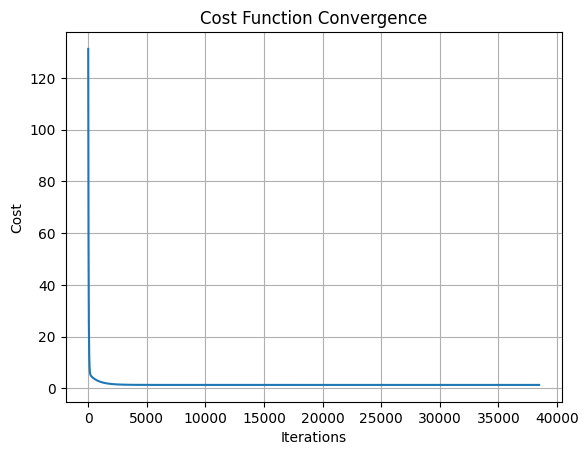

In [31]:
plt.plot(model.cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Visualizing Results

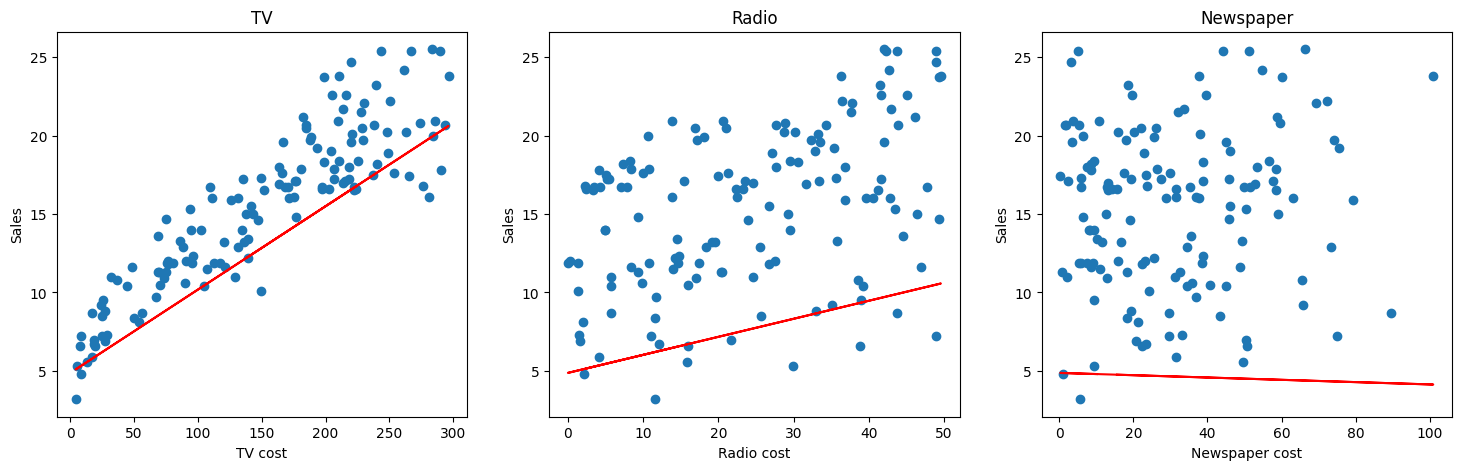

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i, w in enumerate(model.weights):
    feature = x_train[cols[i]]
    regression_line_y = w * feature + model.bias

    ax[i].scatter(feature, y_train)
    ax[i].plot(feature, regression_line_y, 'r')
    
    ax[i].set_title(f"{cols[i]}")
    ax[i].set_xlabel(f"{cols[i]} cost")
    ax[i].set_ylabel("Sales")

# Testing

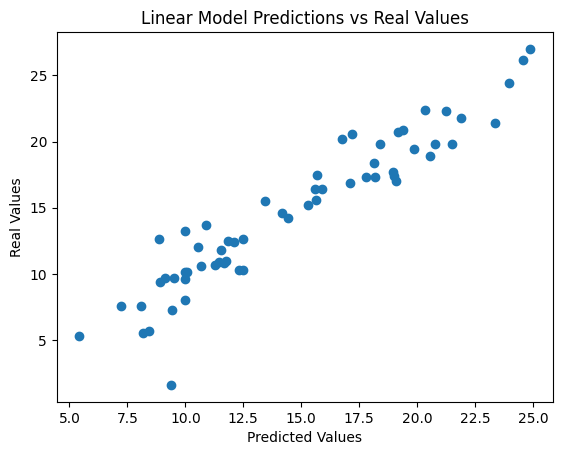

In [33]:
predictions = model.predict(x_test)

plt.scatter(predictions, y_test)
plt.title('Linear Model Predictions vs Real Values')
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
r = ms.correlation(predictions, y_test)
mae = ms.MeanAbsError(predictions, y_test)
rmse = ms.RMSE(predictions, y_test)

print(f'R: {r*100:.2f}%, R²: {r**2*100:.2f}%')
print(f'Mean Absolute Error (MAE): {mae:.2f} \nRoot Mean Squared Error (RMSE): {rmse:.2f}')

R: 94.45%, R²: 89.20%
Mean Absolute Error (MAE): 1.30 
Root Mean Squared Error (RMSE): 3.38
